In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/carbon-majors-emissions-data/emissions_high_granularity.csv
/kaggle/input/carbon-majors-emissions-data/emissions_medium_granularity.csv
/kaggle/input/carbon-majors-emissions-data/emissions_low_granularity.csv


In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [68]:
df = pd.read_csv("/kaggle/input/carbon-majors-emissions-data/emissions_medium_granularity.csv")
print("\n Data Statistics:")
print(df.head())


 Data Statistics:
   year                   parent_entity         parent_type    commodity  \
0  1962  Abu Dhabi National Oil Company  State-owned Entity    Oil & NGL   
1  1962  Abu Dhabi National Oil Company  State-owned Entity  Natural Gas   
2  1963  Abu Dhabi National Oil Company  State-owned Entity    Oil & NGL   
3  1963  Abu Dhabi National Oil Company  State-owned Entity  Natural Gas   
4  1964  Abu Dhabi National Oil Company  State-owned Entity    Oil & NGL   

   production_value production_unit  total_emissions_MtCO2e  
0           0.91250  Million bbl/yr                0.363885  
1           1.84325          Bcf/yr                0.134355  
2           1.82500  Million bbl/yr                0.727770  
3           4.42380          Bcf/yr                0.322453  
4           7.30000  Million bbl/yr                2.911079  


In [69]:
df.tail()

,year,parent_entity,parent_type,commodity,production_value,production_unit,total_emissions_MtCO2e
12546,2020,YPF,State-owned Entity,Natural Gas,394.0,Bcf/yr,28.718814
12547,2021,YPF,State-owned Entity,Oil & NGL,90.0,Million bbl/yr,35.890011
12548,2021,YPF,State-owned Entity,Natural Gas,403.0,Bcf/yr,29.374827
12549,2022,YPF,State-owned Entity,Oil & NGL,98.0,Million bbl/yr,39.080234
12550,2022,YPF,State-owned Entity,Natural Gas,423.0,Bcf/yr,30.832635


In [70]:
df.shape

(12551, 7)

In [7]:
df.nunique()

year                        169
parent_entity               122
parent_type                   3
commodity                     9
production_value          11750
production_unit               4
total_emissions_MtCO2e    12106
dtype: int64

In [71]:
print("\nDuplicates")
print(df.duplicated().sum())


Duplicates
0


In [72]:
df.isnull().sum()

year                      0
parent_entity             0
parent_type               0
commodity                 0
production_value          0
production_unit           0
total_emissions_MtCO2e    0
dtype: int64

In [73]:
df.describe(include='all')

,year,parent_entity,parent_type,commodity,production_value,production_unit,total_emissions_MtCO2e
count,12551.000000,12551,12551,12551,12551.000000,12551,12551.000000
unique,NaN,122,3,9,NaN,4,NaN
top,NaN,Westmoreland Mining,Investor-owned Company,Oil & NGL,NaN,Million tonnes/yr,NaN
freq,NaN,507,6583,3733,NaN,5103,NaN
mean,1987.148116,NaN,NaN,NaN,412.677443,NaN,113.205850
std,29.202455,NaN,NaN,NaN,1357.538128,NaN,329.789848
min,1854.000000,NaN,NaN,NaN,0.004398,NaN,0.000321
25%,1973.000000,NaN,NaN,NaN,10.601353,NaN,8.785294
50%,1994.000000,NaN,NaN,NaN,63.203536,NaN,33.058688
75%,2009.000000,NaN,NaN,NaN,320.664764,NaN,102.154596


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


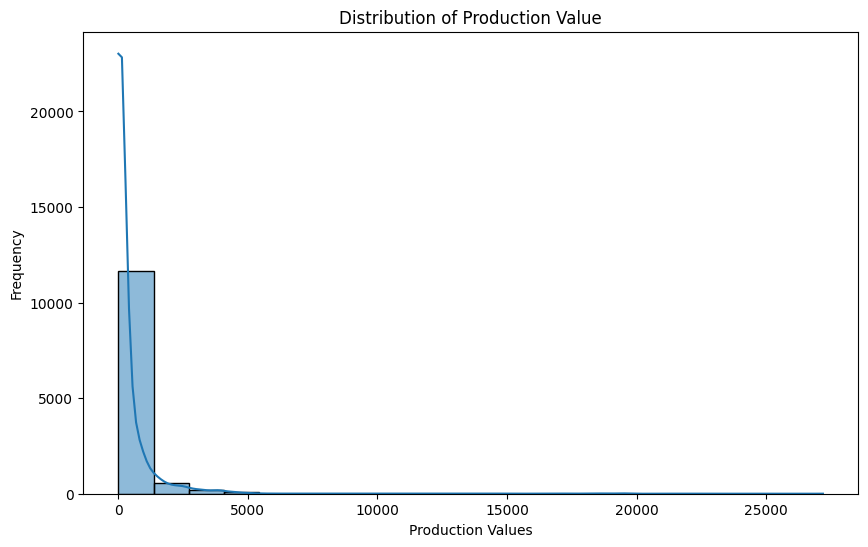

In [74]:
plt.figure(figsize=(10,6))
sns.histplot(df['production_value'],bins=20, kde=True)
plt.xlabel('Production Values')
plt.ylabel('Frequency')
plt.title('Distribution of Production Value')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


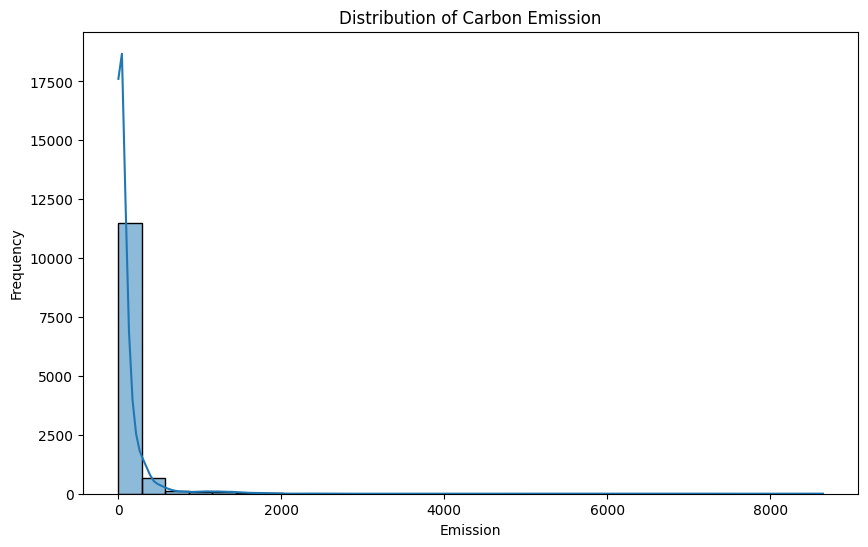

In [75]:
plt.figure(figsize=(10,6))
sns.histplot(df['total_emissions_MtCO2e'],bins=30, kde=True)
plt.xlabel('Emission')
plt.ylabel('Frequency')
plt.title('Distribution of Carbon Emission')
plt.show()

                            year  production_value  total_emissions_MtCO2e
year                    1.000000          0.114833                0.104630
production_value        0.114833          1.000000                0.403559
total_emissions_MtCO2e  0.104630          0.403559                1.000000


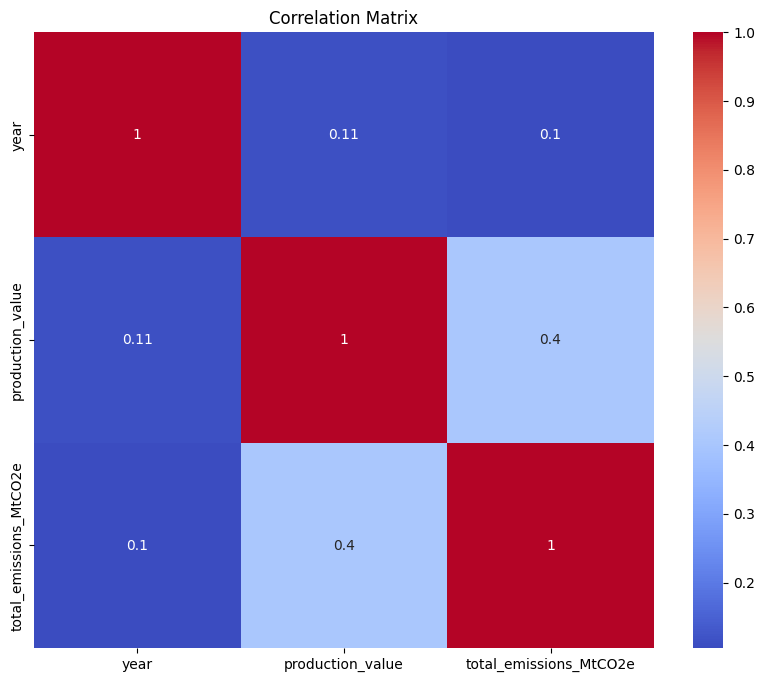

In [76]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()
print(corr_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

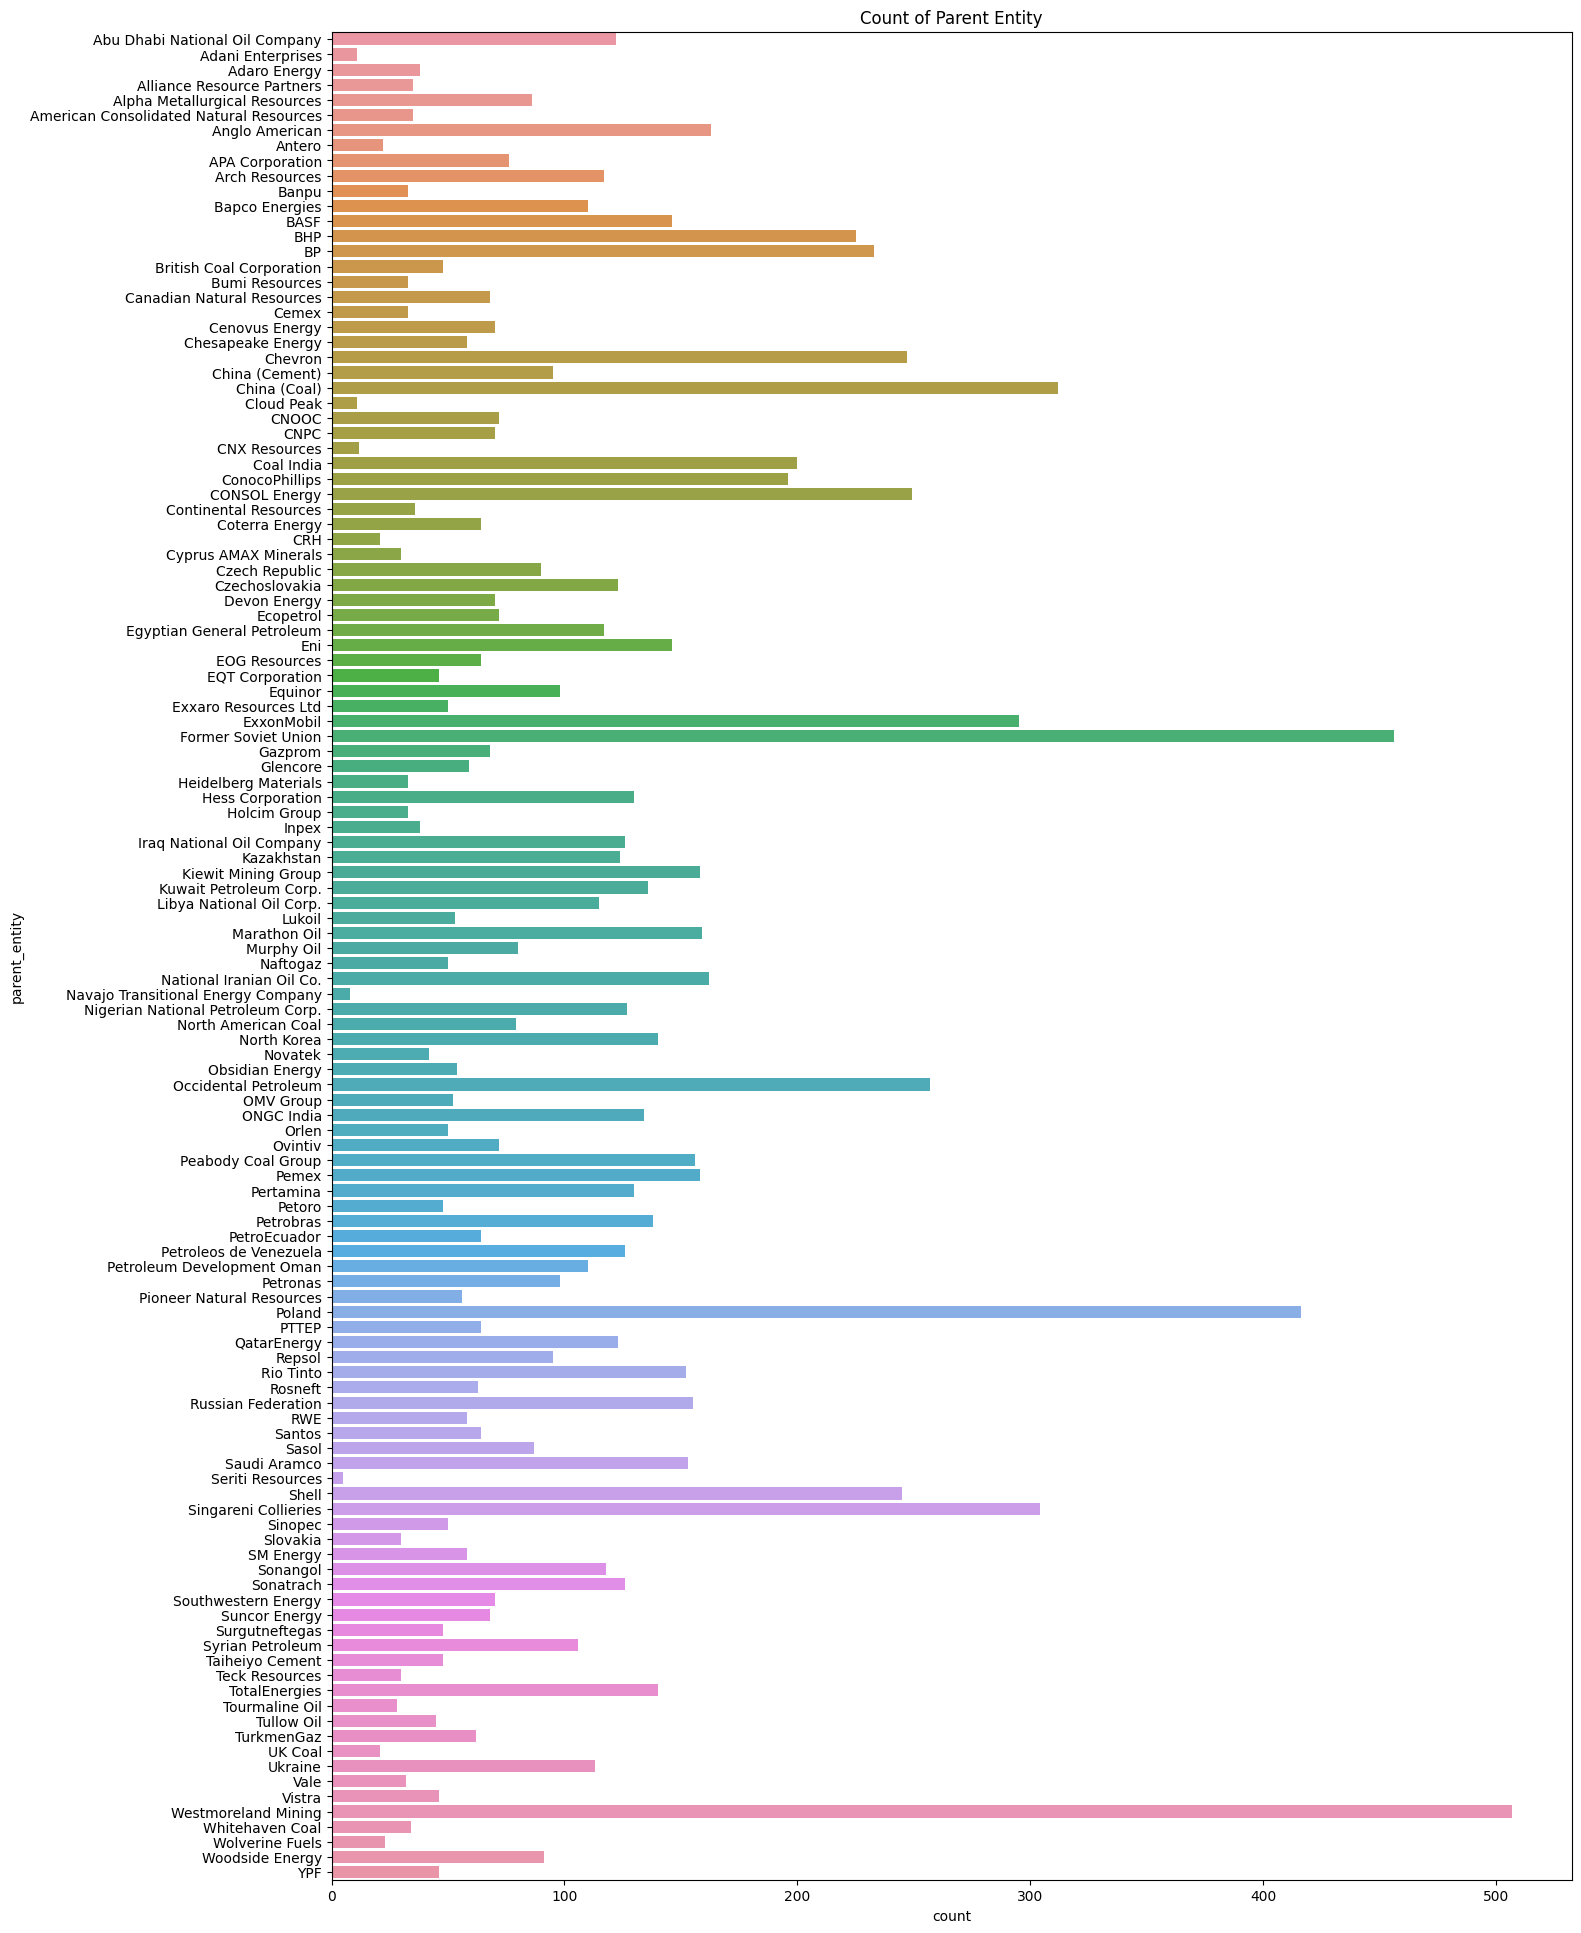

In [77]:
# Countplot for categorical columns
plt.figure(figsize=(16,24))
sns.countplot(y=df['parent_entity'])
plt.title('Count of Parent Entity')
plt.show()

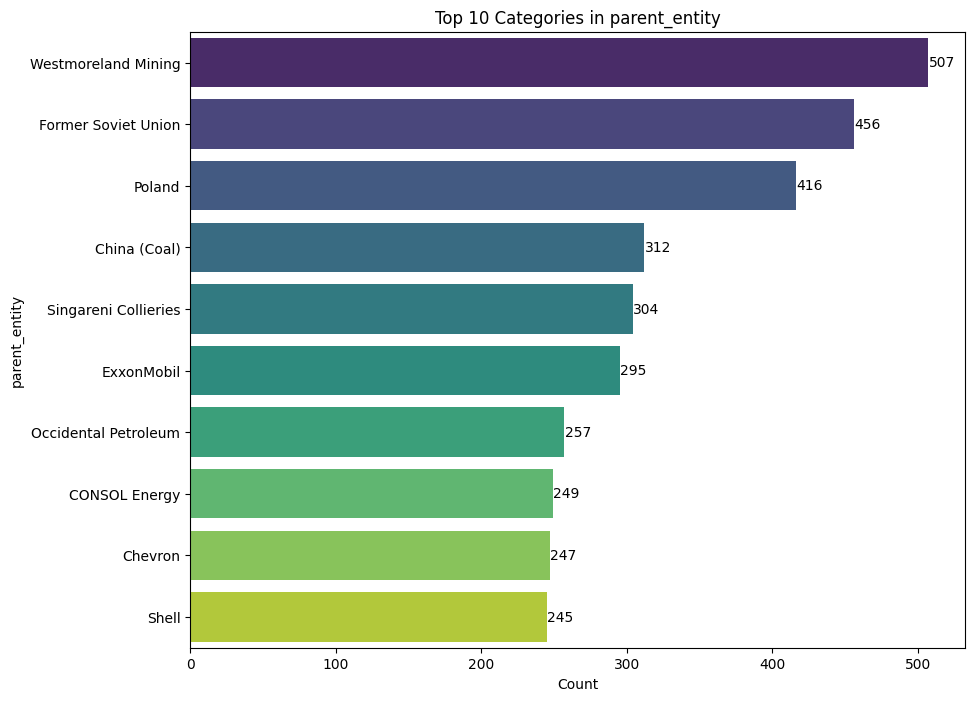

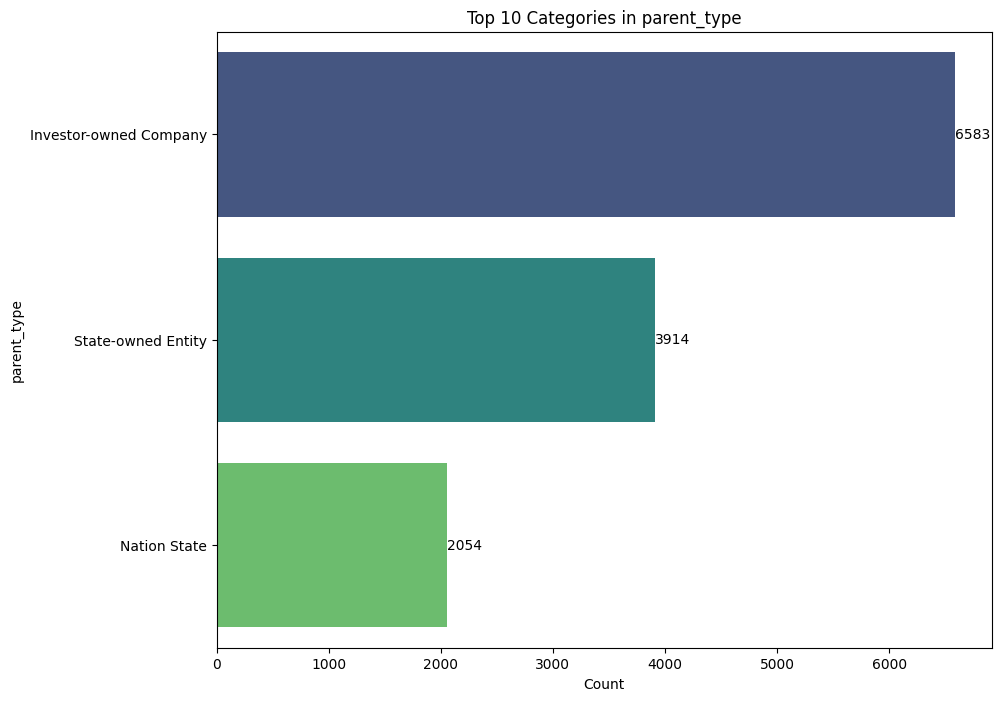

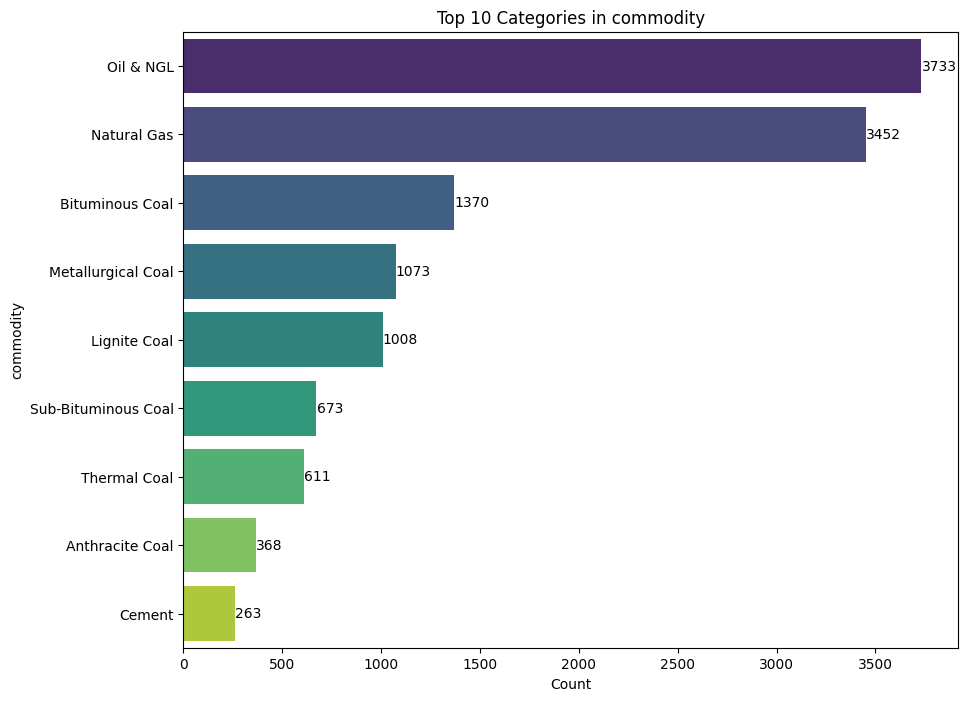

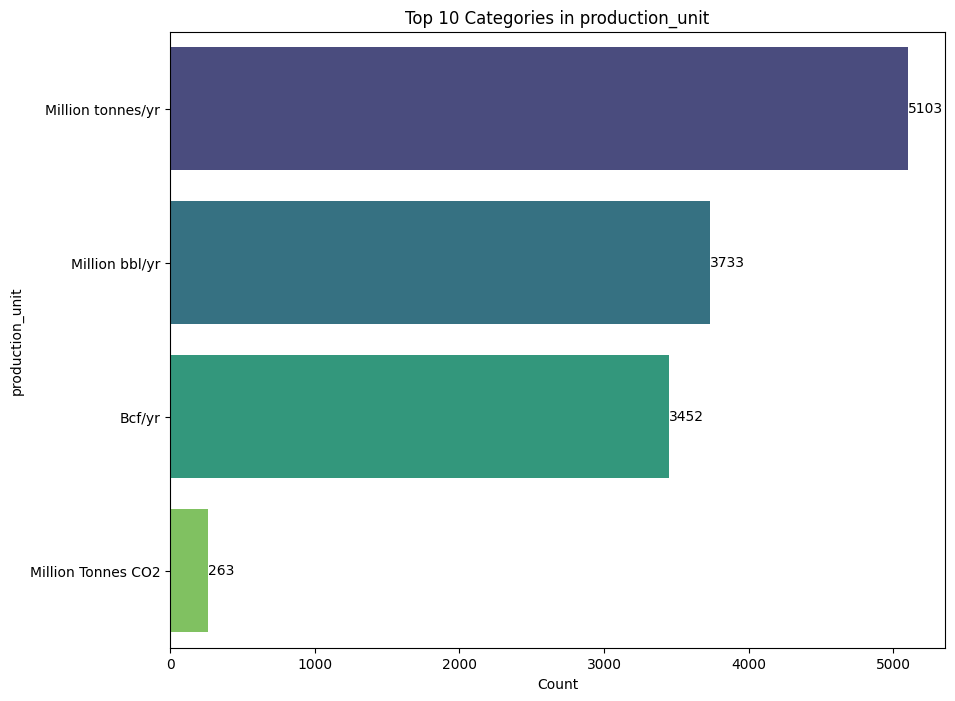

In [78]:
#top 10

catg_col = df.select_dtypes(include=['object']).columns
for col in catg_col:
    top_10 = df[col].value_counts().nlargest(10)
    plt.figure(figsize=(10,8))
    ax = sns.countplot(y=df[col],order=top_10.index,palette='viridis')
    
    for p in ax.patches:
        width = p.get_width()
        plt.text(width + 0.3, p.get_y()+p.get_height()/2,f'{int(width)}',ha='left',va='center')
           
    plt.title(f'Top 10 Categories in {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()

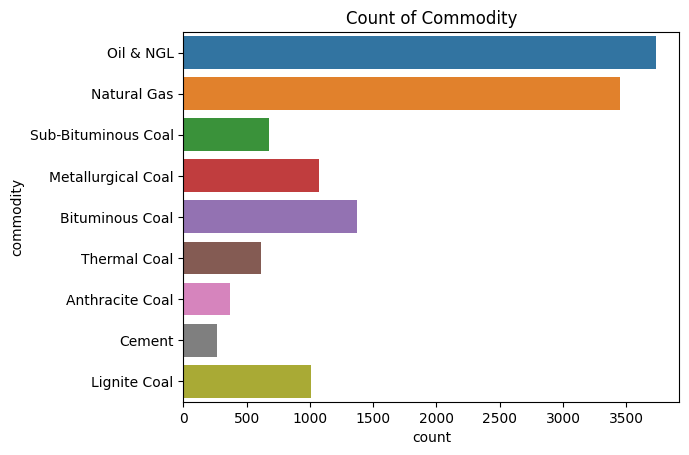

In [79]:
sns.countplot(y=df['commodity'])
plt.title('Count of Commodity')
plt.show()

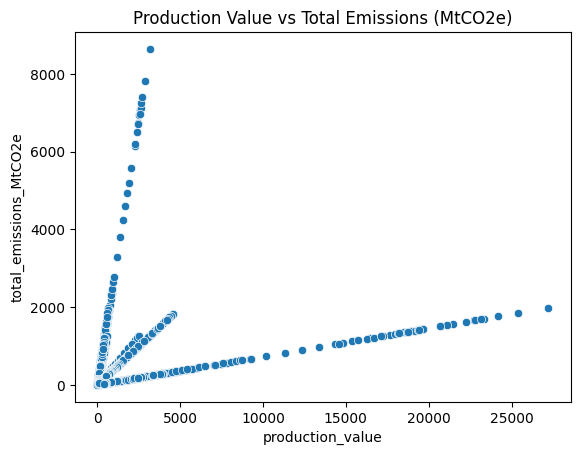

In [80]:
# Scatter plot of production_value vs total_emissions_MtCO2e
sns.scatterplot(data=df,x='production_value', y='total_emissions_MtCO2e')
plt.title('Production Value vs Total Emissions (MtCO2e)')
plt.show()

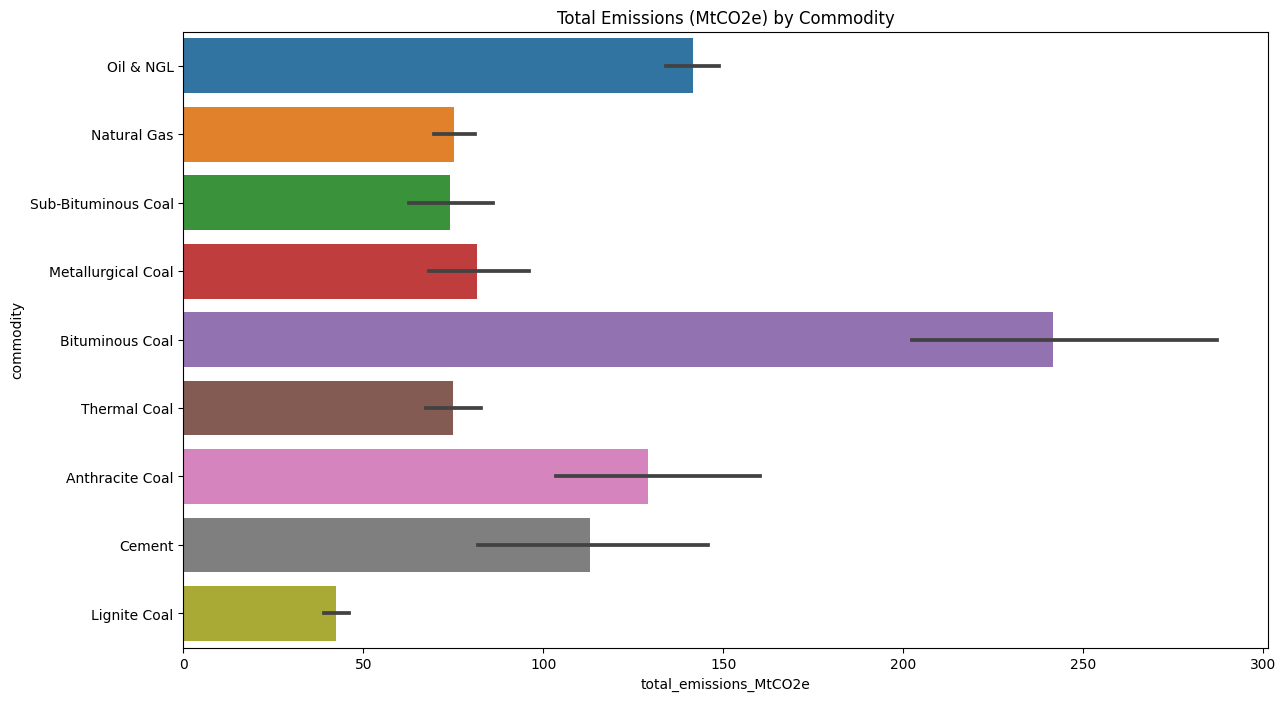

In [81]:
# Boxplot of total_emissions_MtCO2e by commodity
plt.figure(figsize=(14,8))
sns.barplot(data=df, x='total_emissions_MtCO2e', y='commodity')
plt.title('Total Emissions (MtCO2e) by Commodity')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

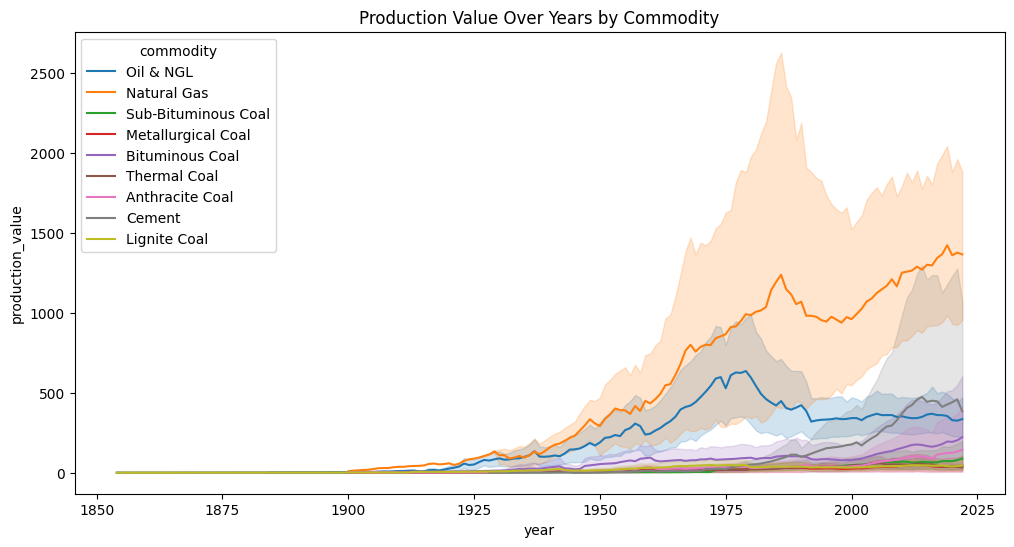

In [82]:
# Production value by year
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='year', y='production_value', hue='commodity')
plt.title('Production Value Over Years by Commodity')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

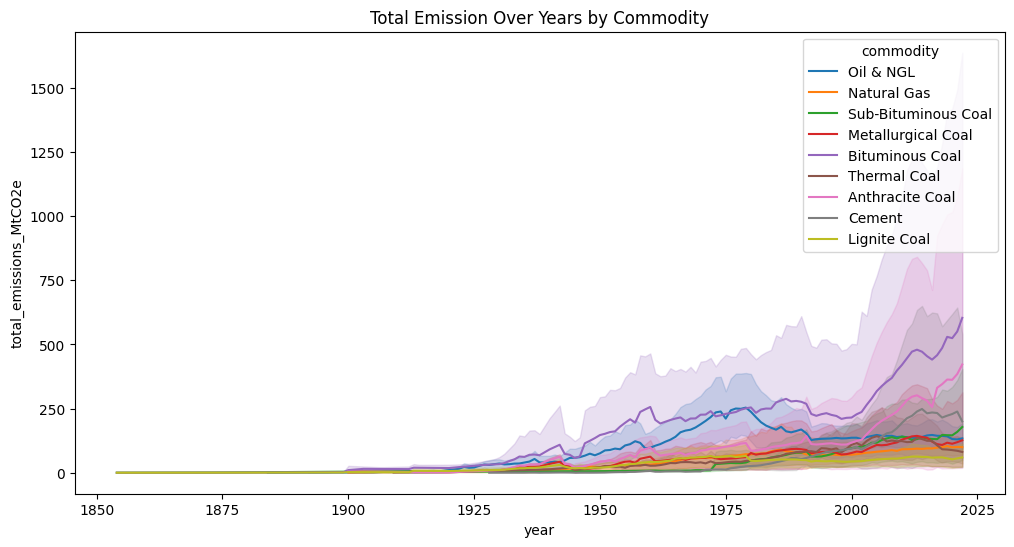

In [26]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='year', y='total_emissions_MtCO2e', hue='commodity')
plt.title('Total Emission Over Years by Commodity')
plt.show()

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12551 entries, 0 to 12550
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    12551 non-null  int64  
 1   parent_entity           12551 non-null  object 
 2   parent_type             12551 non-null  object 
 3   commodity               12551 non-null  object 
 4   production_value        12551 non-null  float64
 5   production_unit         12551 non-null  object 
 6   total_emissions_MtCO2e  12551 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 686.5+ KB


Time Series Analysis.

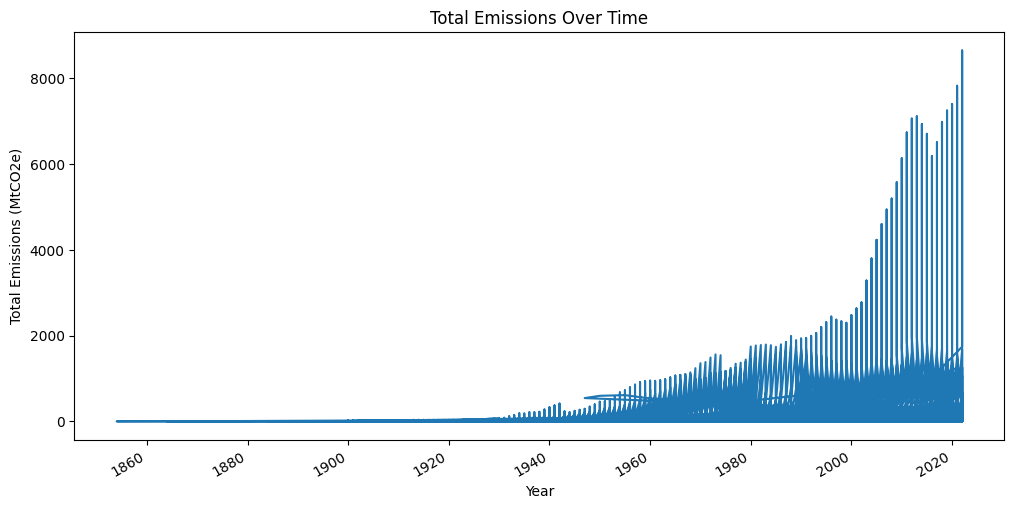

In [89]:
df['year'] = pd.to_datetime(df['year'], format='%Y')
df.set_index('year', inplace=True)

# Plot Total Emissions Over Time
plt.figure(figsize=(12, 6))
df['total_emissions_MtCO2e'].plot()
plt.title('Total Emissions Over Time')
plt.xlabel('Year')
plt.ylabel('Total Emissions (MtCO2e)')
plt.show()

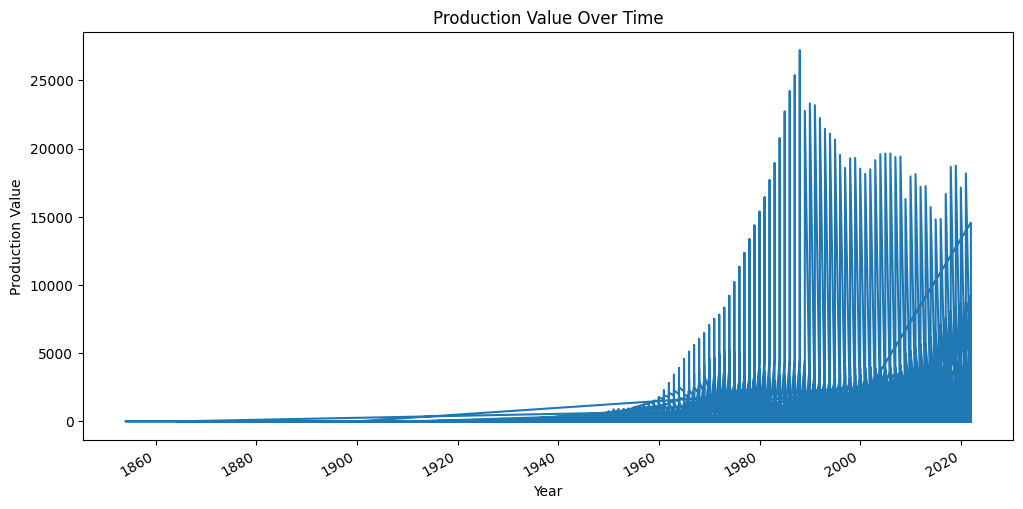

In [58]:
plt.figure(figsize=(12,6))
df['production_value'].plot()
plt.title('Production Value Over Time')
plt.xlabel('Year')
plt.ylabel('Production Value')
plt.show()

Comparative Analysis.

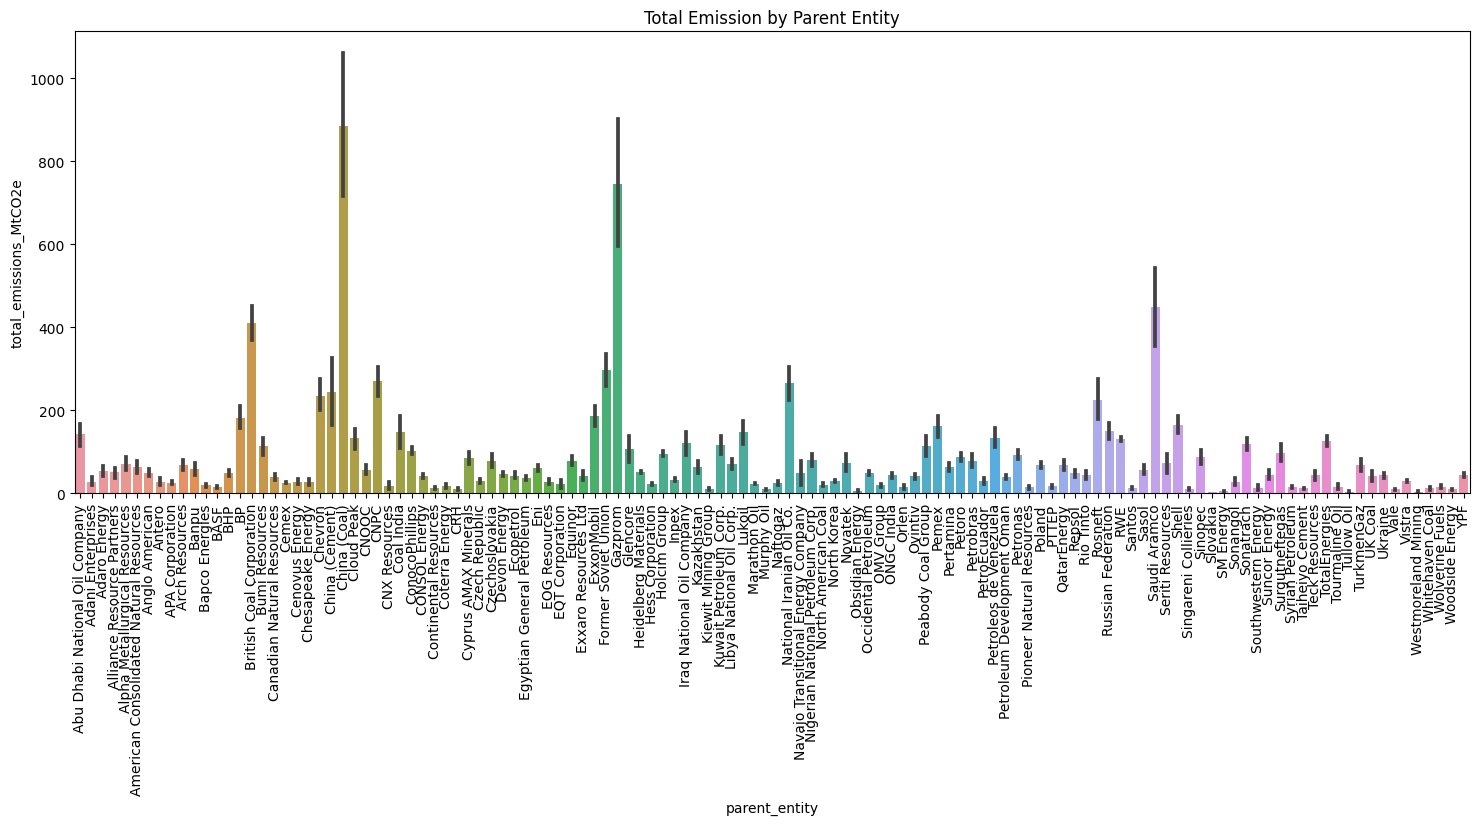

In [101]:
# Compare Emissions by Parent Entity

plt.figure(figsize=(18,6))
sns.barplot(x='parent_entity', y='total_emissions_MtCO2e',data=df)
plt.title('Total Emission by Parent Entity')
plt.xticks(rotation=90)
plt.show()



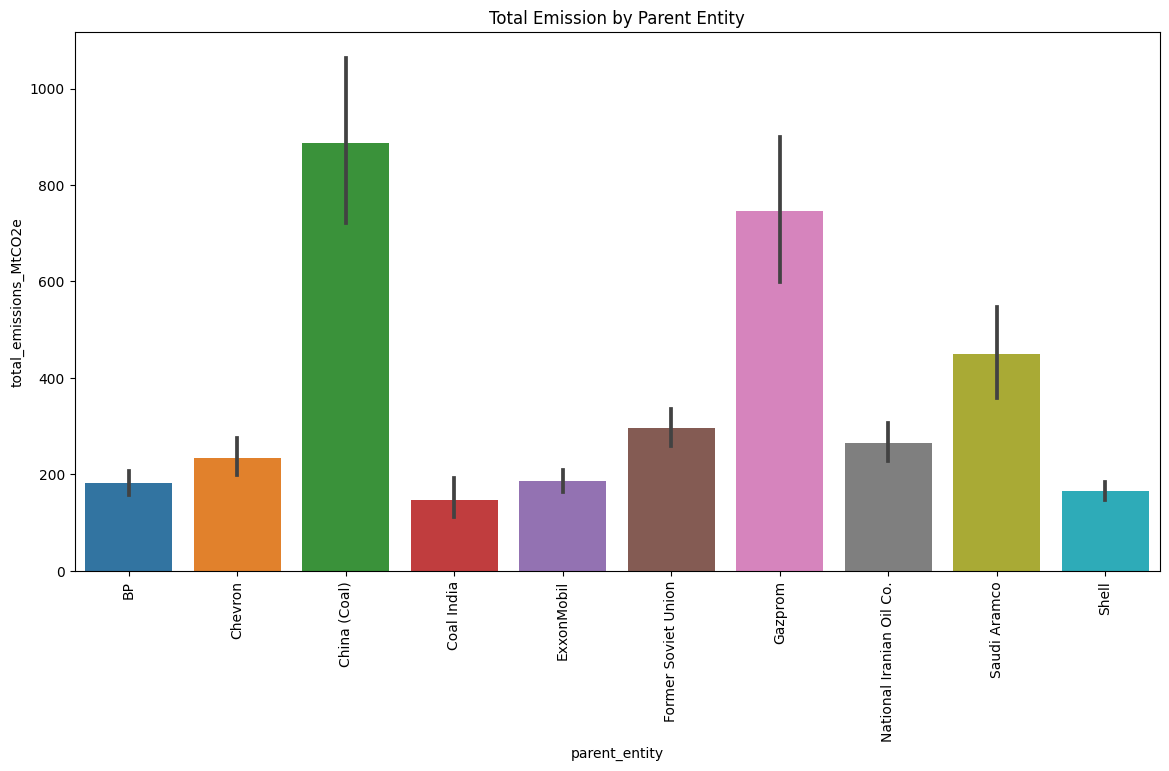

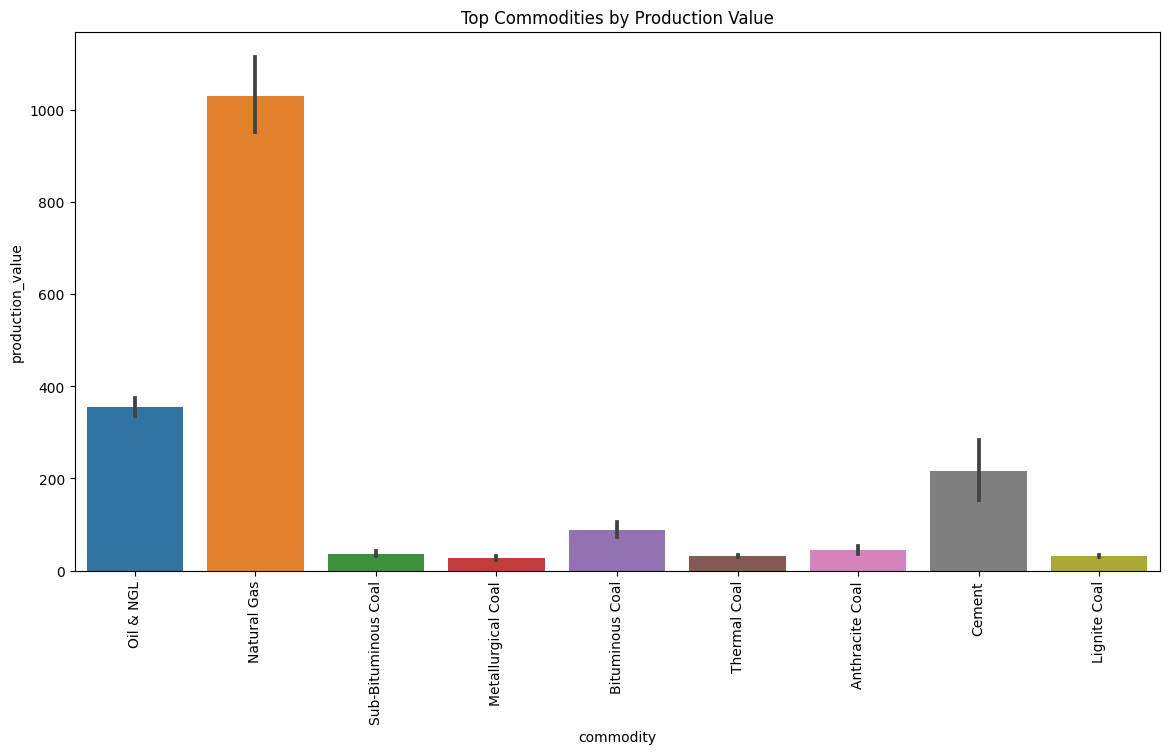

In [114]:
# top 10
# Sort data by total emissions in ascending order and select the top entities

top_entities =df.groupby('parent_entity')['total_emissions_MtCO2e'].sum().nlargest(10).index
df_top_entities = df[df['parent_entity'].isin(top_entities)]
plt.figure(figsize=(14,7))
sns.barplot(x='parent_entity', y='total_emissions_MtCO2e',data=df_top_entities)
plt.title('Total Emission by Parent Entity')
plt.xticks(rotation=90)
plt.show()


top_commodities =df.groupby('commodity')['production_value'].sum().nlargest(10).index
df_top_commodities = df[df['commodity'].isin(top_commodities)]
plt.figure(figsize=(14,7))
sns.barplot(x='commodity', y='production_value',data=df_top_commodities)
plt.title('Top Commodities by Production Value')
plt.xticks(rotation=90)
plt.show()



Regression Analysis

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

Mean Squared Error: 77908.51426177261


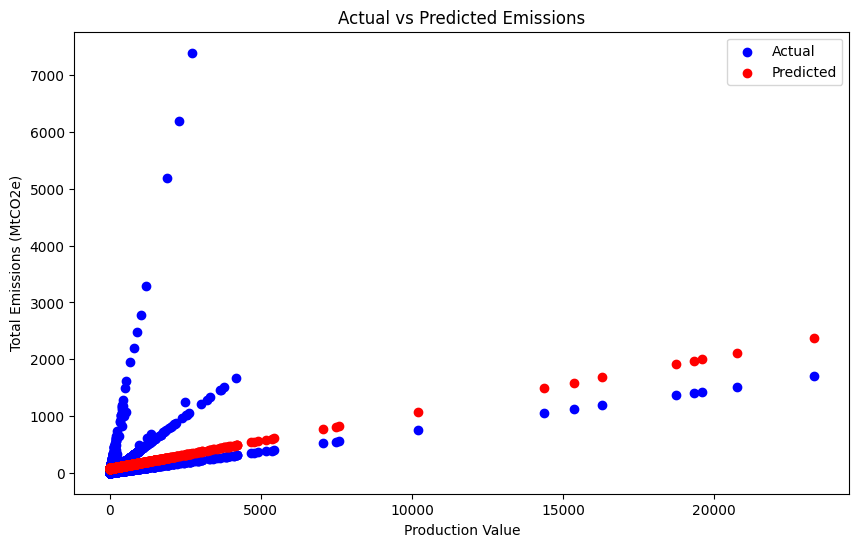

In [126]:
X = df['production_value'].values.reshape(-1, 1)
y = df['total_emissions_MtCO2e']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.title('Actual vs Predicted Emissions')
plt.xlabel('Production Value')
plt.ylabel('Total Emissions (MtCO2e)')
plt.legend()
plt.show()